# Detection efficiency

Get the angular factor $w\equiv A$ that multiplies a GW amplitude relative to optimal orientation. See e.g. [Sathyaprakash B. S., Schutz B. F., 2009, Living Reviews in Relativity, 12]

In [2]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, sin
from scipy.interpolate import interp1d

In [3]:
def F_p(cos_theta, phi, pol):
    return (1+cos_theta**2)/2*cos(2*phi)*cos(2*pol) - cos_theta*sin(2*phi)*sin(2*pol)
def F_c(cos_theta, phi, pol):
    return (1+cos_theta**2)/2*cos(2*phi)*sin(2*pol) + cos_theta*sin(2*phi)*cos(2*pol)
def w(cos_theta, phi, pol, cos_inc):
    return np.sqrt(  (F_p(cos_theta, phi, pol) * (1+cos_inc**2) / 2) ** 2
                   + (F_c(cos_theta, phi, pol) * cos_inc) ** 2)

In [4]:
cos_thetas = np.linspace(-1, 1, 60)
cos_incs = np.linspace(-1,1, 60)
phis = np.linspace(0, 2*np.pi, 60, endpoint=False)
pols = np.linspace(0, 2*np.pi, 60, endpoint=False)
args = np.meshgrid(cos_thetas, phis, pols, cos_incs, indexing='ij')
ws = w(*args)

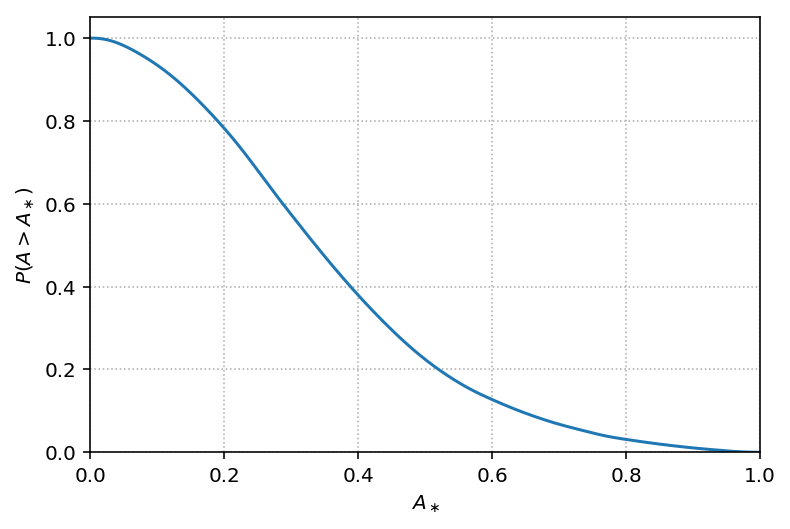

In [16]:
hist, bins = np.histogram(ws.flatten(), bins=30, range=(0,1))
centers = (bins[:-1] + bins[1:]) / 2
w_range, dw = np.linspace(0, 1, 200, retstep=True)
Pw = interp1d(np.concatenate([[0], centers, [1]]), 
               np.concatenate([[0], hist, [0]]), kind='cubic')(w_range)
Pw /= Pw.sum()*dw
P_gr_w = np.cumsum(Pw[::-1])[::-1] * dw
plt.plot(w_range, P_gr_w)
plt.xlim(0,1)
plt.ylim(0)
plt.xlabel(r'$A_\ast$')
plt.ylabel(r'$P(A>A_\ast)$')
plt.grid(ls=':')
plt.savefig('P_gr_w.pdf', bbox_inches='tight')
plt.show()

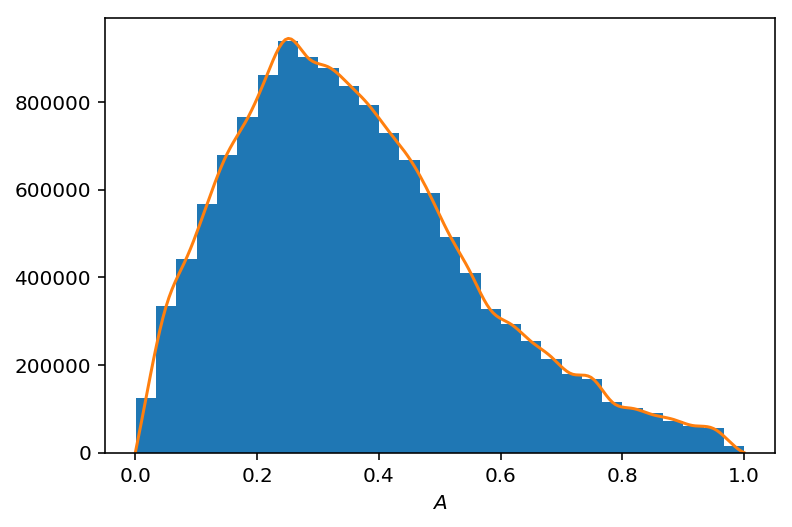

In [17]:
plt.hist(ws.flatten(), bins=30)
plt.plot(w_range, Pw*hist.sum()/30)
plt.xlabel('$A$')
plt.savefig('hist.pdf', bbox_inches='tight')
plt.show()

In [18]:
np.savetxt('P_greater_than_w.dat', tuple(zip(w_range, P_gr_w)), delimiter='\t', header='w\tP_gr_w', fmt='%.5g')

### Get an estimate of how important the redshift effects can be

In [45]:
c_over_H0 = 4422
def z_of_DL(DL):
    return (0.005*(-100.*c_over_H0 + 33.*DL
                   + np.sqrt(10000.*c_over_H0**2 + 33400.*c_over_H0*DL + 1089.*DL**2))
           )/c_over_H0
def DL_of_z(z):
    return c_over_H0*z*(1 + z)/(1 + .33*z)

In [56]:
rho_thresh = 9
DL_max = 71595.0 / rho_thresh
print(z_of_DL(DL_max))

1.15338225052


$$u = \frac{D_L}{D_{L,max}}$$

In [57]:
u, du = np.linspace(0, 1, 200, retstep=True)

def correction(DL):
    return ((u**2 * np.interp(u, w_range, P_gr_w) * (1 + z_of_DL(DL*u))**5).sum()
            / (u**2 * np.interp(u, w_range, P_gr_w)).sum())

In [58]:
DLs = np.linspace(0, DL_max, 100)
corrections = [correction(D) for D in DLs]

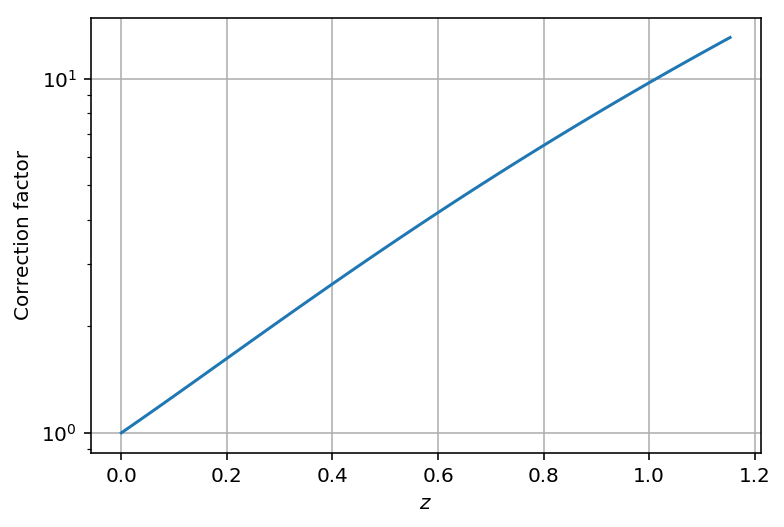

In [59]:
plt.semilogy(z_of_DL(DLs), corrections)
plt.ylabel('Correction factor')
plt.xlabel('$z$')
plt.grid()
plt.show()

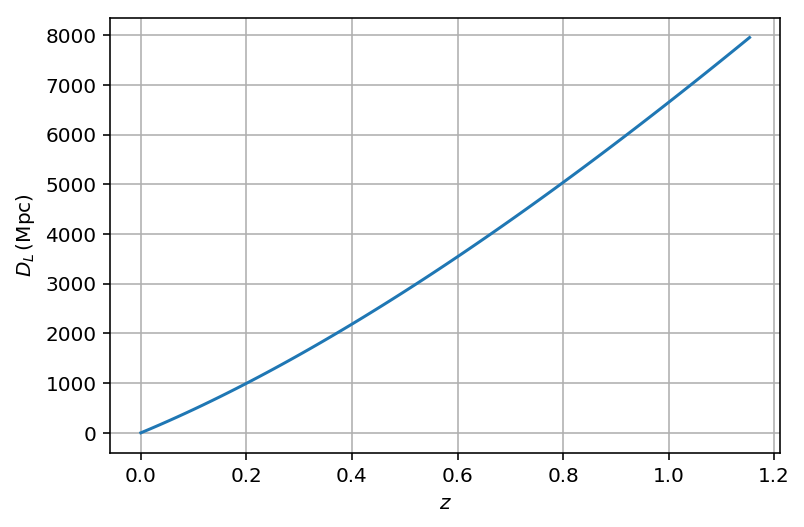

In [60]:
plt.plot(z_of_DL(DLs), DLs)
plt.ylabel(r'$D_L\,({\rm Mpc})$')
plt.xlabel('$z$')
plt.grid()
plt.show()